In [1]:
import librosa
import torch
import matplotlib.pyplot as plt
from scipy.signal import chirp, sweep_poly
from nnAudio.Spectrogram import *

In [ ]:
np.save("tests/ground-truths/linear-sweep-cqt-2010-mag-ground-truth.npy")

In [4]:
def test_cqt_2010_v2_linear(device):
    # Linear sweep case
    fs = 44100
    t = 1
    f0 = 55
    f1 = 22050
    s = np.linspace(0, t, fs*t)
    x = chirp(s, f0, 1, f1, method='linear')
    x = x.astype(dtype=np.float32)

    # Magnitude
    stft = CQT2010v2(sr=fs, fmin=55, device=device, output_format="Magnitude",
                     n_bins=207, bins_per_octave=24)
    X = stft(torch.tensor(x, device=device).unsqueeze(0))
    ground_truth = np.load("tests/ground-truths/linear-sweep-cqt-2010-mag-ground-truth.npy")
    X = torch.log(X + 1e-5)
    assert np.allclose(X.cpu(), ground_truth, rtol=1e-3, atol=1)

    # Complex
    stft = CQT2010v2(sr=fs, fmin=55, device=device, output_format="Complex",
                     n_bins=207, bins_per_octave=24)
    X = stft(torch.tensor(x, device=device).unsqueeze(0))
    ground_truth = np.load("tests/ground-truths/linear-sweep-cqt-2010-complex-ground-truth.npy")
    assert np.allclose(X.cpu(), ground_truth, rtol=1e-3, atol=1e-3)

    # Phase
    stft = CQT2010v2(sr=fs, fmin=55, device=device, output_format="Phase",
                     n_bins=207, bins_per_octave=24)
    X = stft(torch.tensor(x, device=device).unsqueeze(0))
    ground_truth = np.load("tests/ground-truths/linear-sweep-cqt-2010-phase-ground-truth.npy")
    return X.cpu(), ground_truth
    assert np.allclose(X.cpu(), ground_truth, rtol=1e-3, atol=1e-3)

In [5]:
a, b = test_cqt_2010_v2_linear('cpu')

Low pass filter created, time used = 0.0016 seconds
num_octave =  9
No early downsampling is required, downsample_factor =  1
Early downsampling filter created,                         time used = 0.0002 seconds
CQT kernels created, time used = 0.0129 seconds
Low pass filter created, time used = 0.0010 seconds
num_octave =  9
No early downsampling is required, downsample_factor =  1
Early downsampling filter created,                         time used = 0.0001 seconds
CQT kernels created, time used = 0.0088 seconds
Low pass filter created, time used = 0.0007 seconds
num_octave =  9
No early downsampling is required, downsample_factor =  1
Early downsampling filter created,                         time used = 0.0001 seconds
CQT kernels created, time used = 0.0080 seconds


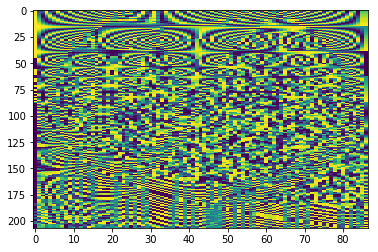

In [15]:
plt.imshow(a[0,:,:,0].detach(), aspect='auto')

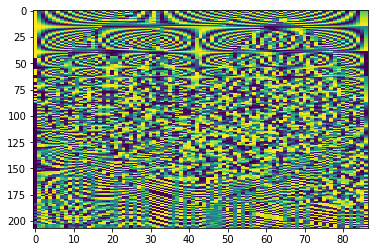

In [21]:
plt.imshow(b[0,:,:,0].real, aspect='auto')

In [24]:
X = torch.randn((10,10,10), device='cuda:0')

In [25]:
np.save('./test_file', X.cpu())

In [27]:
ground_truth = np.load('./test_file.npy')

In [28]:
np.allclose(X.cpu(), ground_truth)

True